In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy import nan


In [4]:
midwest_data = pd.read_csv('MidwestMurderData.csv')
midwest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145080 entries, 0 to 145079
Data columns (total 32 columns):
ID              145080 non-null object
CNTYFIPS        145080 non-null object
Ori             145080 non-null object
State           145080 non-null object
Agency          145080 non-null object
Agentype        145080 non-null object
Source          145080 non-null object
Solved          145080 non-null object
Year            145080 non-null int64
StateName       145080 non-null object
Month           145080 non-null object
Incident        145080 non-null int64
ActionType      145080 non-null object
Homicide        145080 non-null object
Situation       145080 non-null object
VicAge          145080 non-null int64
VicSex          145080 non-null object
VicRace         145080 non-null object
VicEthnic       145080 non-null object
OffAge          145080 non-null int64
OffSex          145080 non-null object
OffRace         145080 non-null object
OffEthnic       145080 non-null obj

In [5]:
print('Homocide:', midwest_data[midwest_data.Homicide == 'Murder and non-negligent manslaughter'].ID.count())
print('Negligent manslaughter:', midwest_data[midwest_data.Homicide != 'Murder and non-negligent manslaughter'].ID.count())

Homocide: 143188
Negligent manslaughter: 1892


In [6]:
# Offender count by gender
print('Male offender count is:',midwest_data['OffSex'].value_counts()['Male'])
print('Female offender count is:',midwest_data['OffSex'].value_counts()['Female'])
print('Unknown offender count is:',midwest_data['OffSex'].value_counts()['Unknown'])


Male offender count is: 87750
Female offender count is: 12146
Unknown offender count is: 45184


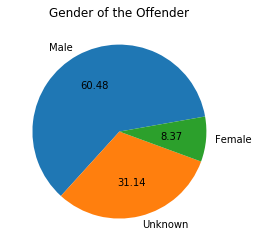

In [7]:
offender_gender = pd.DataFrame(midwest_data, columns = ['OffSex']) 
count_offender_gender = offender_gender.stack().value_counts()
ax = count_offender_gender.plot(kind = 'pie',
                              title = 'Gender of the Offender',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')
plt.show()

In [8]:
#Victim count by gender
print('Male victim count is:',midwest_data['VicSex'].value_counts()['Male'])
print('Female victim count is:',midwest_data['VicSex'].value_counts()['Female'])
print('Unknown victim count is:',midwest_data['VicSex'].value_counts()['Unknown'])

Male victim count is: 111465
Female victim count is: 33402
Unknown victim count is: 213


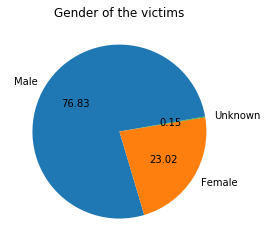

In [9]:
gender = pd.DataFrame(midwest_data, columns = ['VicSex']) 
count_gender = gender.stack().value_counts()
ax = count_gender.plot(kind = 'pie',
                              title = 'Gender of the victims',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')
plt.show()

In [10]:
# Solved vs unsolved crime
print('Unsolved:', midwest_data[midwest_data.Solved == 'No'].ID.count())
print('Solved:', midwest_data[midwest_data.Solved == 'Yes'].ID.count())

Unsolved: 45193
Solved: 99887


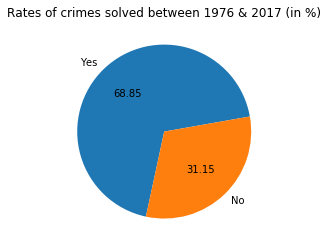

In [11]:
solved = pd.DataFrame(midwest_data, columns = ['Solved']) 
resolution = solved.stack().value_counts()
ax = resolution.plot(kind = 'pie',
                              title = 'Rates of crimes solved between 1976 & 2017 (in %)',
                              startangle = 10,
                              autopct='%.2f')
ax.set_ylabel('')
plt.show()

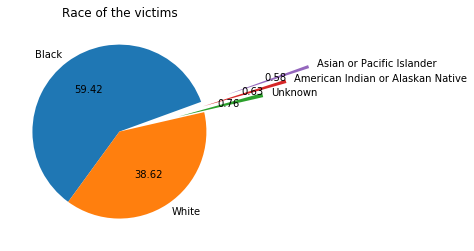

In [12]:
race = pd.DataFrame(midwest_data, columns = ['VicRace']) 
victim_race = race.stack().value_counts()
ax = victim_race.plot(kind = 'pie',
                              title = 'Race of the victims',
                              startangle = 20,
                              autopct='%.2f',
                              explode=(0, 0, 0.7, 1, 1.3))
ax.set_ylabel('')
plt.show()

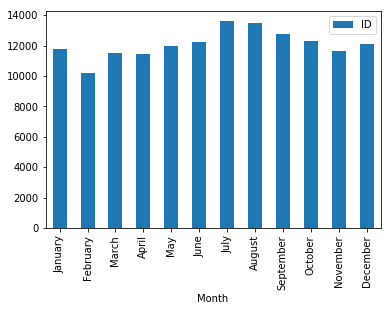

In [13]:
month_group = midwest_data.groupby(['Month']).count().ID.reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mapping = {month: i for i, month in enumerate(months)}
key = month_group['Month'].map(mapping)
month_group = month_group.iloc[key.argsort()]

month_group.plot(kind='bar', x='Month')

plt.show()

In [14]:
month_group

,Month,ID
4,January,11754
3,February,10187
7,March,11521
0,April,11420
8,May,11956
6,June,12251
5,July,13625
1,August,13515
11,September,12773
10,October,12287


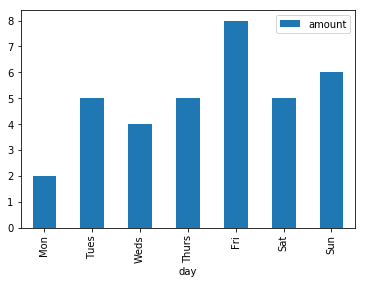

In [17]:
df=pd.DataFrame({
    'group':['a','a','a','a','a','a','a','b','b','b','b','b','b','b'],
    'day':['Mon','Tues','Fri','Thurs','Sat','Sun','Weds','Fri','Sun','Thurs','Sat','Weds','Mon','Tues'],
    'amount':[1,2,4,2,1,1,2,4,5,3,4,2,1,3]
})


# Calculate the total amount for each day
df_grouped = df.groupby(['day']).sum().amount.reset_index()

# Use Dan's trick to order days names in the table created by groupby
weekdays = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']
mapping = {day: i for i, day in enumerate(weekdays)}
key = df_grouped['day'].map(mapping)    
df_grouped = df_grouped.iloc[key.argsort()]

# Draw the bar chart
df_grouped.plot(kind='bar', x='day')

In [ ]:
df_grouped.head()

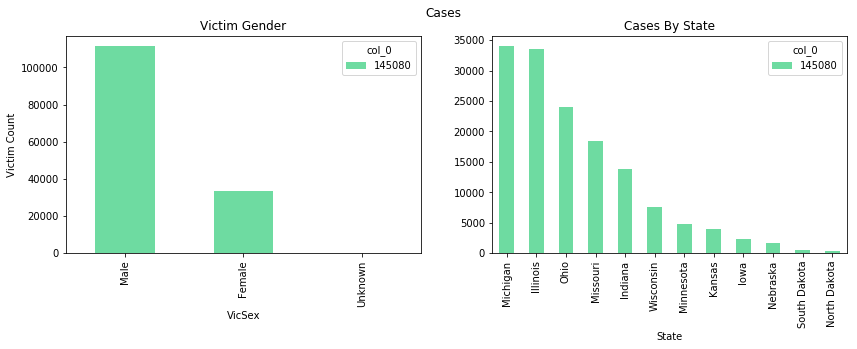

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

#
ax = (pd.crosstab(midwest_data.VicSex,len(midwest_data.VicSex)).sort_values(len(midwest_data.VicSex), ascending=False).plot(kind='bar', color='#6EDBA1', title='Victim Gender',ax=axes[0]))

fig.suptitle('Cases')
ax.set_ylabel('Victim Count')
# Cases per state
ax = (pd.crosstab(midwest_data.State,len(midwest_data.State))
        .sort_values(len(midwest_data.State), ascending=False)
        .plot(kind='bar', color= '#6EDBA1',title ='Cases By State', ax=axes[1]))


In [15]:
state_df = midwest_data[['VicSex', 'State', 'Month', 'Solved']]

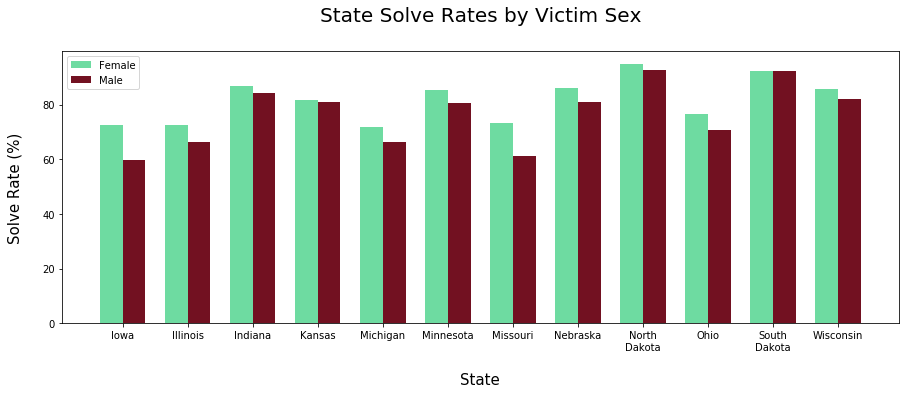

In [21]:
solved_state= midwest_data[['VicSex','State','Solved']]
solved_state=solved_state.groupby(by=['VicSex', 'State','Solved']).agg({ 'Solved':'count'})
solved_state= solved_state.groupby(level=[0,1]).apply(lambda x:100 * x/x.sum())
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
solved_state.columns=["Solved_count"]
ind = np.arange(12)
width = 0.35

for name, group in solved_state.groupby(level=0):
    if name == "Female":
        group= group.reset_index().drop("VicSex",1)
        group=group[group["Solved"]=="Yes"]
        ax.bar(ind, group["Solved_count"], width, label=name, color='#6EDBA1')
    if name == "Male":
        group= group.reset_index().drop("VicSex",1)
        group=group[group["Solved"]=="Yes"]
        ax.bar(ind + width, group["Solved_count"], width, label=name, color='#721121')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.title('State Solve Rates by Victim Sex', fontname='Chaparral Pro', loc='center', pad=30, fontsize=20)
plt.xlabel("State", labelpad=20, fontname='Chaparral Pro', fontsize=15)
plt.ylabel("Solve Rate (%)", labelpad=20, fontname='Chaparral Pro', fontsize=15)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('Iowa', 'Illinois', 'Indiana', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 
                     'North\nDakota', 'Ohio', 'South\nDakota', 'Wisconsin') )


plt.show()

In [17]:
solved_state

Solved_count
VicSex  State Solved              
Female  IA    No         24.643536
              Yes        75.356464
        IL    No         27.311971
              Yes        72.688029
        KS    No         18.438538
              Yes        81.561462
        MI    No         28.175550
              Yes        71.824450
        MN    No         14.605171
              Yes        85.394829
        MO    No         26.600496
              Yes        73.399504
        ND    No          5.298013
              Yes        94.701987
        NE    No         13.988658
              Yes        86.011342
        OH    No         23.588373
              Yes        76.411627
        SD    No          7.881773
              Yes        92.118227
        WI    No         14.463007
              Yes        85.536993
Male    IA    No         31.505928
              Yes        68.494072
        IL    No         40.159855
              Yes        59.840145
        KS    No         19.014599
              Yes        80.985401
        MI    No         33.714502
              Yes        66.285498
...                            ...
        MO    No         38.768418
              Yes        61.231582
        ND    No          7.468880
              Yes        92.531120
        NE    No         19.147084
              Yes        80.852916
        OH    No         29.263824
              Yes        70.736176
        SD    No          7.563025
              Yes        92.436975
        WI    No         18.071178
              Yes        81.928822
Unknown IA    No         60.000000
              Yes        40.000000
        IL    No         52.173913
              Yes        47.826087
        KS    No         60.000000
              Yes        40.000000
        MI    No         53.333333
              Yes        46.666667
        MN    No         62.500000
              Yes        37.500000
        MO    No         81.818182
              Yes        18.181818
        ND    Yes       100.000000
        OH    No         36.363636
              Yes        63.636364
        SD    Yes       100.000000
        WI    No         33.333333
              Yes        66.666667

[62 rows x 1 columns]

In [18]:
vic_df = state_df[['VicSex','State']]
female = vic_df.loc[vic_df["VicSex"] =="Female", :]
female_victims = female.groupby('State').count()
female_victims_df = female_victims.rename(columns={"VicSex":'Female Victim'})
female_df = female_victims_df.reset_index().sort_values('Female Victim')


male = vic_df.loc[vic_df["VicSex"] == "Male", :]
male_victims = male.groupby('State').count()
male_victims_df = male_victims.rename(columns={"VicSex": "Male Victim"})
male_df = male_victims_df.reset_index().sort_values("Male Victim")

combined_df = pd.merge(female_df, male_df, on= "State", how= "left")

combined_df

,State,Female Victim,Male Victim
0,ND,151,241
1,SD,203,357
2,NE,529,1149
3,KS,1204,2740
4,MN,1431,3327
5,WI,2095,5423
6,MO,4030,14388
7,IA,4208,11893
8,OH,5986,18012
9,IL,6023,27525


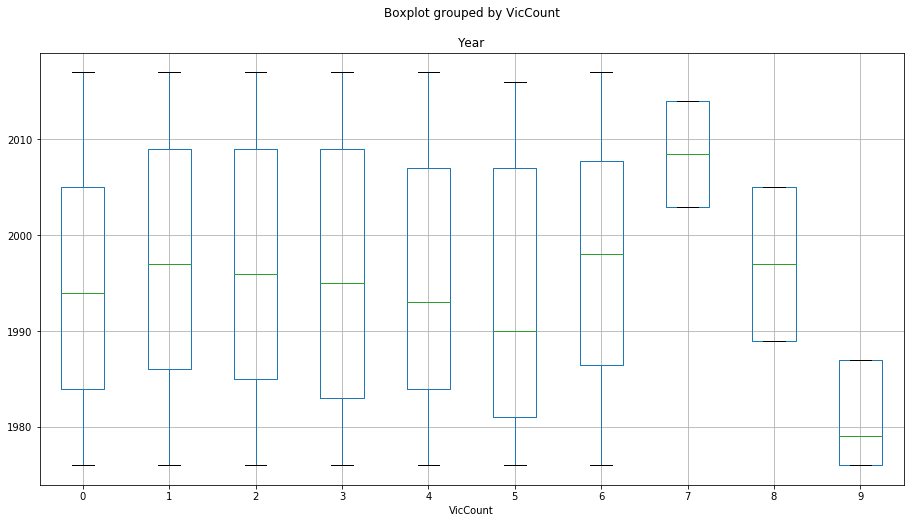

In [19]:
midwest_data.boxplot("Year", by="VicCount", figsize=(15, 8))

In [20]:
group0 = midwest_data[midwest_data["VicCount"] == 0]["Year"]
group1 = midwest_data[midwest_data["VicCount"] == 1]["Year"]
group2 = midwest_data[midwest_data["VicCount"] == 2]["Year"]
group3 = midwest_data[midwest_data["VicCount"] == 3]["Year"]
group4 = midwest_data[midwest_data["VicCount"] == 4]["Year"]
group5 = midwest_data[midwest_data["VicCount"] == 5]["Year"]
group6 = midwest_data[midwest_data["VicCount"] == 6]["Year"]
group7 = midwest_data[midwest_data["VicCount"] == 7]["Year"]
group8 = midwest_data[midwest_data["VicCount"] == 8]["Year"]
group9 = midwest_data[midwest_data["VicCount"] == 9]["Year"]


In [21]:
stats.f_oneway(group0,group1, group2,group3, group4, group5,group6, group7, group8, group9)

F_onewayResult(statistic=50.582914384047754, pvalue=3.0614042327996557e-92)

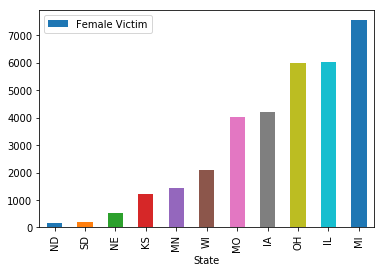

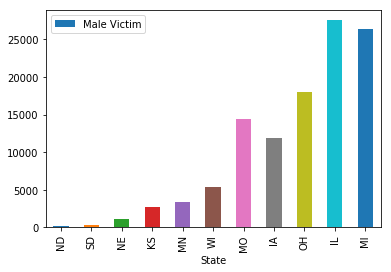

In [22]:
# probably dont need these ones
combined_df.plot(kind='bar',x='State',y='Female Victim',)
combined_df.plot(kind='bar',x='State',y='Male Victim',)

In [23]:
# Extract individual groups
group1 = midwest_data[midwest_data["Month"] == 1]["VicAge"]
group2 = midwest_data[midwest_data["Month"] == 2]["VicAge"]
group3 = midwest_data[midwest_data["Month"] == 3]["VicAge"]

In [24]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=nan, pvalue=nan)

In [25]:
victim_group = midwest_data.groupby('Month')

# Counting victims
vic_count = victim_group['VicCount'].count()

vic_count

Month
April        11420
August       13515
December     12133
February     10187
January      11754
July         13625
June         12251
March        11521
May          11956
November     11658
October      12287
September    12773
Name: VicCount, dtype: int64

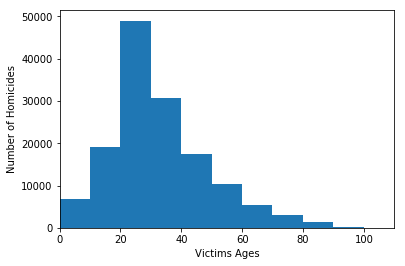

In [26]:
age = plt.hist(midwest_data['VicAge'],bins=100)
plt.xlabel('Victims Ages')
plt.ylabel('Number of Homicides');
age = plt.xlim(0,110)



plt.show()

In [27]:
#crimefile = []
#for col in midwest_data.columns.values:
    #if len(set(midwest_data[col])) < 50:
        #print(col, set(midwest_data[col]))
        #crimefile.append(col)
        
#print(crimefile)